# Movie Recommendation System

## Overview
The objective of this project is to build a movie recommendation system that provides personalized recommendations to users based on their ratings of other movies. The system will utilize machine learning algorithms to analyze user ratings and similarities between movies to generate a list of top 5 movie recommendations for each user.


## Business understanding

In the age of streaming services and an abundance of movie alternatives, customers frequently face the issue of finding films that match their preferences. A movie recommendation system seeks to solve this problem by using user ratings to generate individualized movie recommendations. The target audience for this project are companies that provide movie streaming services, such as Netflix, Amazon Prime Video, or Hulu, which can in turn use recommendation systems to increase their customer engagement and retention. These businesses can provide personalized movie suggestions that adapt to their audience's different preferences by employing innovative machine learning techniques and user data, resulting in growth and competitive advantage in the entertainment industry. 

## Data Understanding

### Source:
 a) This data set is obtained from GroupLens
 
 b) (https://grouplens.org/datasets/movielens/latest/)

### Details on the data set:

The dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. Each user is represented by an id, and no other information is provided.

The data are contained in the following files: **links.csv**, **movies.csv**, **ratings.csv** and **tags.csv**. 

**Ratings Data File Structure (ratings.csv):** All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).



**Tags Data File Structure (tags.csv):** All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

userId,movieId,tag,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.


**Movies Data File Structure (movies.csv):**Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. 

**Links Data File Structure (links.csv):**Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,imdbId,tmdbId


### Description of columns
**User Ids:** MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).

**Movie Ids:** Only movies with at least one rating or tag are included in the dataset. Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

**Timestamps:** represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

**Tags:** are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

**Genres:** are a pipe-separated list, and are selected from the following:

Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, (no genres listed)

### Citation
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872


### Importing necessary Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import sparse 
from surprise import Reader, Dataset
from sklearn.metrics. pairwise import cosine_similarity
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'surprise'

### Loading the Datasets

In [4]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')
links = pd.read_csv('data/links.csv')
tags = pd.read_csv('data/tags.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Exploratory Data Analysis and Data Pre-processing

### Ratings dataset

In [7]:
ratings.shape

(100836, 4)

In [8]:
# Checking for null values in the dataset
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

The ratings csv file has 4 columns and 100,836 columns non of which have any null values

In [9]:
# Drop unnecessary columns
ratings = ratings.drop(columns='timestamp')
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### Links dataset

In [10]:
links.shape

(9742, 3)

In [11]:
# Checking for null values in the dataset
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

The links csv file has 3 columns and 9,742 columns non of which have any null values.

### Movies dataset

In [12]:
movies.shape

(9742, 3)

In [13]:
# Checking for null values in the dataset
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

The movies csv file has 3 columns and 9,742 columns non of which have any null values.

### Tags dataset

In [14]:
tags.shape

(3683, 4)

In [15]:
# Checking for null values in the dataset
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [16]:
#Loading Data into Pandas DataFrame using Surprise Library
reader = Reader()
data = Dataset.load_from_df(ratings,reader)

NameError: name 'Reader' is not defined

In [17]:
# Finding out how many users and items that are in the dataset.
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

NameError: name 'data' is not defined

## Data Visualisation 

#### Movie Genre Distribution

In [18]:
# Extract the genre information for each movie
genres = [genre.split('|') for genre in movies['genres']]

# Filter out movies without genres and extract genre information
filtered_genres = []
for genre_str in movies['genres']:
    if genre_str != 'No genres listed':  
        genres = genre_str.split('|')
        filtered_genres.append(genres)

# Create genre counts dictionary
genre_counts = {}
for genre_list in filtered_genres:
    for genre in genre_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1
# Sort the genres by their count, in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

#Print the genres and their counts
for genre, count in sorted_genres:
    print(f'{genre}: {count} movies')

Drama: 4361 movies
Comedy: 3756 movies
Thriller: 1894 movies
Action: 1828 movies
Romance: 1596 movies
Adventure: 1263 movies
Crime: 1199 movies
Sci-Fi: 980 movies
Horror: 978 movies
Fantasy: 779 movies
Children: 664 movies
Animation: 611 movies
Mystery: 573 movies
Documentary: 440 movies
War: 382 movies
Musical: 334 movies
Western: 167 movies
IMAX: 158 movies
Film-Noir: 87 movies
(no genres listed): 34 movies


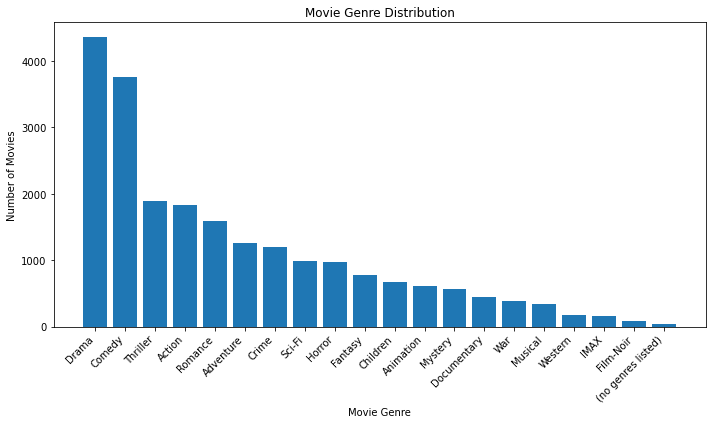

In [19]:
 #Extract genre labels and movie counts for plotting
genre_labels = [genre for genre, count in sorted_genres]
movie_counts = [count for genre, count in sorted_genres]

# Create a bar chart to visualize genre vs movie count
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.bar(genre_labels, movie_counts)
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genre Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()